In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os 
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [2]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv') 

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Age data is missing in train set. The proportion of Age missing is small enough for reasonable replacement with mean value. In Cabin column, we have so many missing values out of the whole data so we will drop this column

In [8]:
# Replacing the missing vlaues in "Age" column with mean 
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# Dropping the "Cabin" column from the train data 
train.drop(columns='Cabin', axis=1 , inplace=True )
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
# Dropping the "Cabin" column from the test data 
test.drop(columns='Cabin', axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train['Embarked'].fillna('S', inplace=True)

In [15]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [18]:
missing_fare_row = test[test['Fare'].isnull()]
missing_fare_row

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [19]:
test.dropna(subset=['Fare'], inplace=True)

In [20]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
#Now let's check the probability of survival for each sex
train.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

### Visualization 

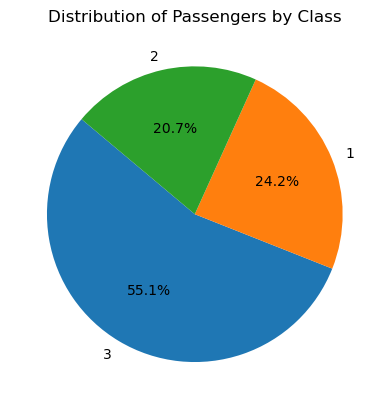

In [22]:
class_counts = train['Pclass'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passengers by Class')
plt.savefig('passengers_by_class_pie.png')
plt.show()

* From here we find Pclass 3 have more Passangers 

### Age Distribution of Passengers

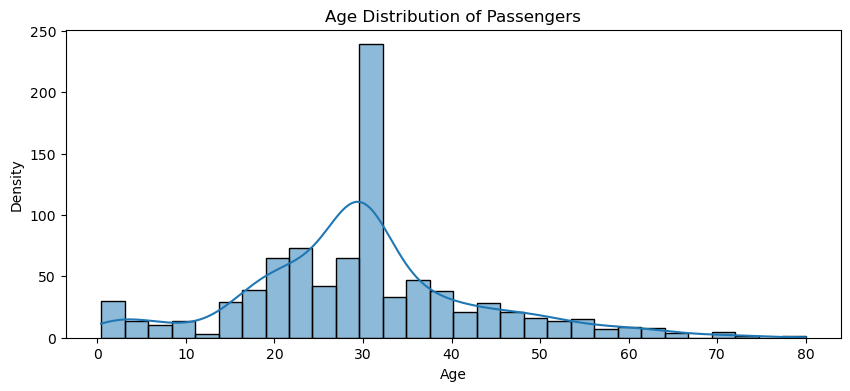

In [23]:
plt.figure(figsize=(10, 4))
sns.histplot(train['Age'],kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.savefig('age_distribution.png')
plt.show()

* We find mean of age between 28 to 30

<AxesSubplot:xlabel='Survived', ylabel='count'>

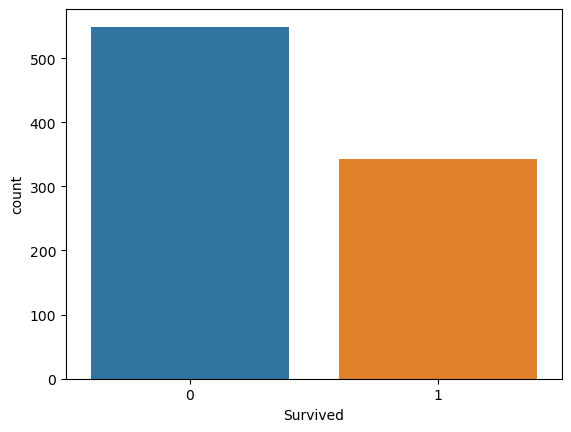

In [24]:
#plot for Survived Column
sns.countplot(x='Survived', data=train)

* Here Num of people died more than live 

### Now we find peoples who die more than Survived 

In [25]:
females = train[train['Sex'] == 'female']
females['Survived'].value_counts()/len(females)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [26]:
males = train[train['Sex'] == 'male']
males['Survived'].value_counts()/len(males)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

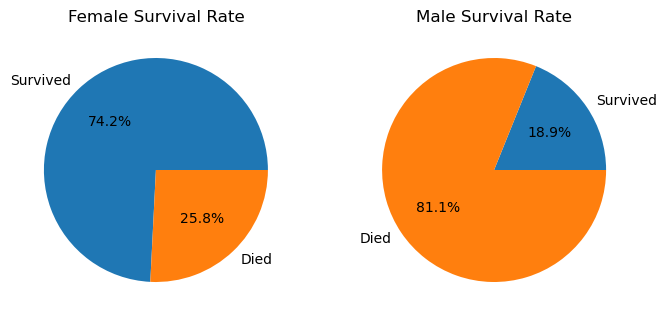

In [27]:
female_survival_counts = females['Survived'].value_counts()
male_survival_counts = males['Survived'].value_counts()

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.pie([female_survival_counts[1], female_survival_counts[0]], 
        labels=['Survived', 'Died'], 
        autopct='%1.1f%%')
plt.title("Female Survival Rate")


plt.subplot(2,2,2)
plt.pie([male_survival_counts[1], male_survival_counts[0]], 
        labels=['Survived', 'Died'], 
        autopct='%1.1f%%')
plt.title("Male Survival Rate")
plt.show()


### Here Females live more than males 

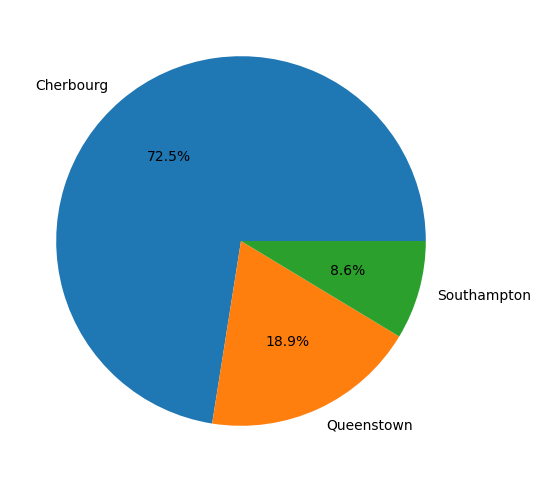

In [28]:
#Create a pie chart to see how many passengers embarked from each port
fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))
ax1.pie(train['Embarked'].value_counts(), labels=['Cherbourg', 'Queenstown', 'Southampton'], autopct='%1.1f%%')
plt.show()

<AxesSubplot:>

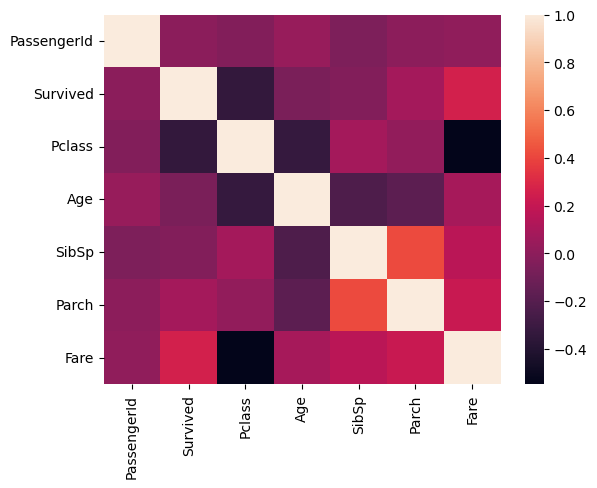

In [29]:
sns.heatmap(train.corr())

# Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [31]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [32]:
cat_features = train.select_dtypes(include=["object","category"]).columns
cat_features

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [33]:
columns = ['Name', 'Sex','Embarked']

In [34]:
for col in columns:
    train[col] = lb.fit_transform(train[col])

In [35]:
train.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,-0.049173,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.006117,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


### Feature Selection
#### Drop Useless Columns

In [36]:
train = train.drop(["PassengerId", "Name", "Ticket"], axis = 1)
test = test.drop(["PassengerId", "Name", "Ticket"], axis = 1)

#### Split Data To x and y

In [37]:
x = train.drop(columns=['Survived'])
y = train['Survived']

### Split the data into training and test 

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 7), (712,), (179, 7), (179,))

### Training Model
### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LinearRegression() 

In [41]:
model.fit(X_train ,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
score1 =r2_score(y_test , y_pred)

print("R2score : ",score1)

R2score :  0.44259025015467224


In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred ,y_test)
print("Mse :" , mse)

Mse : 0.13517286465148393


## DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()

In [46]:
model2.fit(X_train ,y_train)

DecisionTreeRegressor()

In [47]:
y_pred2 = model.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
score2 =r2_score(y_test , y_pred2)

print("R2score : ",score2)

R2score :  0.44259025015467224


## RandomForestClassifier

In [49]:
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
model3_acc = accuracy_score(y_test,y_pred3)

print("Random forest accuracy Score:",model3_acc)

Random forest accuracy Score: 0.8100558659217877


### LogisticRegression

In [50]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred4 = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4)

print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.8100558659217877


#### Importance

In [60]:
feature_importances = model3.feature_importances_

feature_import = pd.DataFrame({
    "features": X_train.columns,
    "importance": feature_importances
}).sort_values(by="importance",ascending=False)

In [61]:
feature_import

,features,importance
1,Sex,0.270886
5,Fare,0.263350
2,Age,0.249570
0,Pclass,0.087436
3,SibSp,0.053531
4,Parch,0.040991
6,Embarked,0.034237
